In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [17]:
# Function to clean df_credit
def clean_credit(df):
    # Handle Missing Values
    imputer = SimpleImputer(strategy='mean')
    df.iloc[:, :] = imputer.fit_transform(df)

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Correct data types 
    df = df.astype({
        'Time': 'float64', 'V1': 'float64', 'V2': 'float64', 'V3': 'float64', 'V4': 'float64', 'V5': 'float64',
        'V6': 'float64', 'V7': 'float64', 'V8': 'float64', 'V9': 'float64', 'V10': 'float64', 'V11': 'float64',
        'V12': 'float64', 'V13': 'float64', 'V14': 'float64', 'V15': 'float64', 'V16': 'float64', 'V17': 'float64',
        'V18': 'float64', 'V19': 'float64', 'V20': 'float64', 'V21': 'float64', 'V22': 'float64', 'V23': 'float64',
        'V24': 'float64', 'V25': 'float64', 'V26': 'float64', 'V27': 'float64', 'V28': 'float64', 'Amount': 'float64',
        'Class': 'int64'
    })
    return df

In [18]:
# Function to clean df_fraud
def clean_fraud(df):
    # Convert time columns to datetime
    df['signup_time'] = pd.to_datetime(df['signup_time'])
    df['purchase_time'] = pd.to_datetime(df['purchase_time'])

    # Handle Missing Values
    imputer = SimpleImputer(strategy='mean')
    df['ip_address'] = imputer.fit_transform(df[['ip_address']])

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Correct data types
    df = df.astype({
        'user_id': 'int64', 'purchase_value': 'int64', 'device_id': 'object',
        'source': 'object', 'browser': 'object', 'sex': 'object', 'age': 'int64',
        'ip_address': 'float64', 'class': 'int64'
    })
    return df

In [19]:
# Function to clean df_ip
def clean_ip(df):
    # Handle Missing Values
    imputer = SimpleImputer(strategy='mean')
    df['lower_bound_ip_address'] = imputer.fit_transform(df[['lower_bound_ip_address']])

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Correct data types
    df = df.astype({
        'lower_bound_ip_address': 'float64', 'upper_bound_ip_address': 'int64', 'country': 'object'
    })
    return df

In [20]:
df_credit=pd.read_csv('../Data/creditcard.csv')
df_fraud=pd.read_csv('../Data/Fraud_Data.csv')
df_Ip=pd.read_csv('../Data/IpAddress_to_Country.csv')

### Clean the data frames

In [21]:
df_credit_cleaned = clean_credit(df_credit)
df_fraud_cleaned = clean_fraud(df_fraud)
df_ip_cleaned = clean_ip(df_Ip)

In [22]:
print(df_credit_cleaned.info())
print(df_fraud_cleaned.info())
print(df_ip_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [23]:
# Save cleaned data frames 
df_credit_cleaned.to_csv('../Data/credit_card_clean.csv', index=False)
df_fraud_cleaned.to_csv('../Data/fraud_Data_clean.csv', index=False)
df_ip_cleaned.to_csv('../Data/ipAddress_clean.csv', index=False)

In [24]:
df_credit_cleaned.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
df_fraud_cleaned.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [26]:
df_ip_cleaned.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [27]:
dataframes=[df_ip_cleaned, df_fraud_cleaned, df_credit_cleaned]
for i in dataframes:
    print(i.isnull().sum())

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [28]:
# univariate_analysis
def univariate_analysis(df, column):
    print(f"Summary statistics for {column}:")
    print(df[column].describe())
    plt.figure(figsize=(10, 5))
    
    if np.issubdtype(df[column].dtype, np.number):
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
    else:
        plt.subplot(1, 2, 1)
        sns.countplot(x=df[column])
        plt.title(f'Count plot of {column}')
        
        plt.subplot(1, 2, 2)
        df[column].value_counts().plot.pie(autopct='%1.1f%%')
        plt.title(f'Pie chart of {column}')
    
    plt.show()

Summary statistics for Amount:
count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64


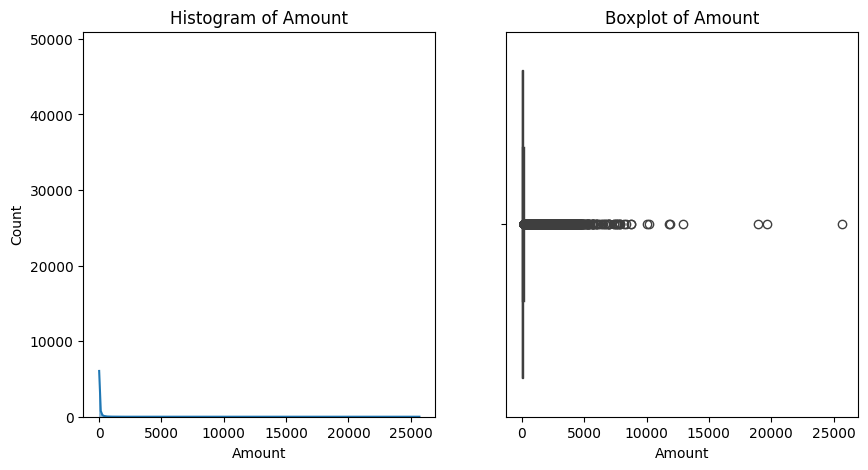

Summary statistics for Class:
count    283726.000000
mean          0.001667
std           0.040796
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64


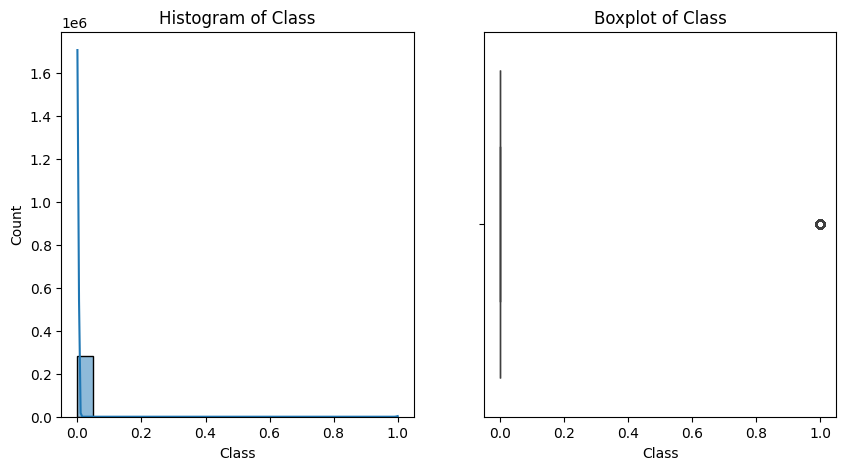

Summary statistics for purchase_value:
count    151112.000000
mean         36.935372
std          18.322762
min           9.000000
25%          22.000000
50%          35.000000
75%          49.000000
max         154.000000
Name: purchase_value, dtype: float64


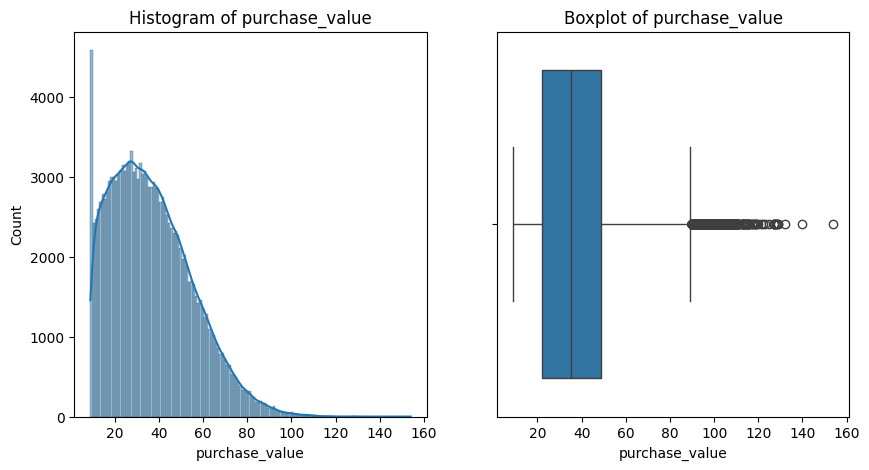

Summary statistics for browser:
count     151112
unique         5
top       Chrome
freq       61432
Name: browser, dtype: object


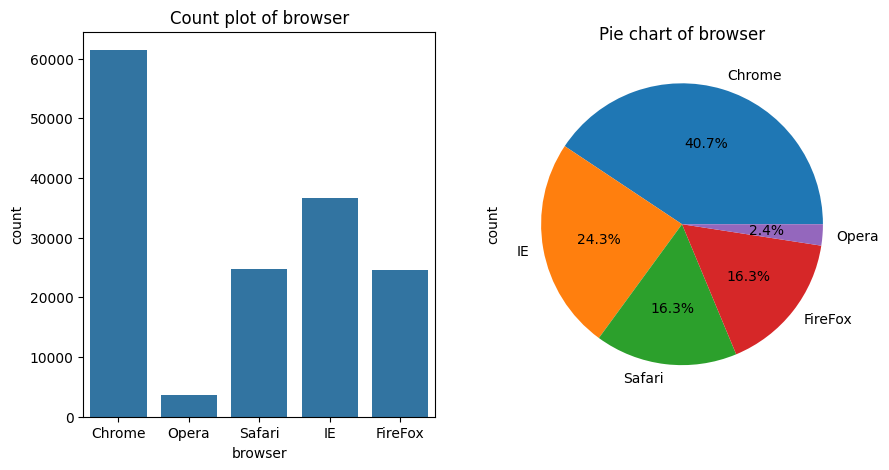

Summary statistics for country:
count            138846
unique              235
top       United States
freq              46868
Name: country, dtype: object


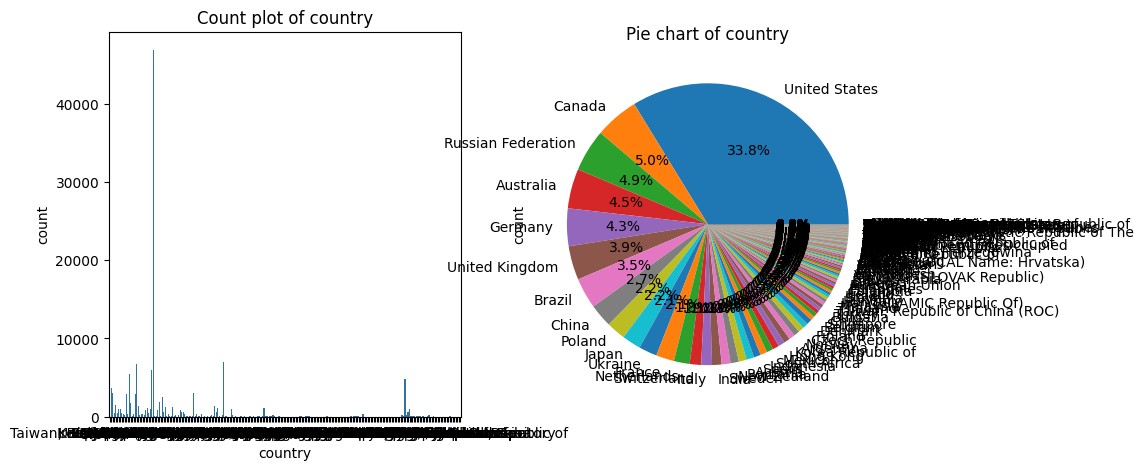

In [29]:
univariate_analysis(df_credit_cleaned, 'Amount')
univariate_analysis(df_credit_cleaned, 'Class')

univariate_analysis(df_fraud_cleaned, 'purchase_value')
univariate_analysis(df_fraud_cleaned, 'browser')

univariate_analysis(df_ip_cleaned, 'country')

In [30]:
# bivariate_analysis
def bivariate_analysis(df, col1, col2):
    print(f"Bivariate analysis between {col1} and {col2}:")
    plt.figure(figsize=(10, 5))
    
    if np.issubdtype(df[col1].dtype, np.number) and np.issubdtype(df[col2].dtype, np.number):
        sns.scatterplot(x=col1, y=col2, data=df)
        plt.title(f'Scatter plot between {col1} and {col2}')
    elif np.issubdtype(df[col1].dtype, np.number) and not np.issubdtype(df[col2].dtype, np.number):
        sns.boxplot(x=col2, y=col1, data=df)
        plt.title(f'Box plot of {col1} by {col2}')
    elif not np.issubdtype(df[col1].dtype, np.number) and np.issubdtype(df[col2].dtype, np.number):
        sns.boxplot(x=col1, y=col2, data=df)
        plt.title(f'Box plot of {col2} by {col1}')
    else:
        sns.countplot(x=col1, hue=col2, data=df)
        plt.title(f'Count plot of {col1} by {col2}')
    
    plt.show()

Bivariate analysis between Amount and Class:


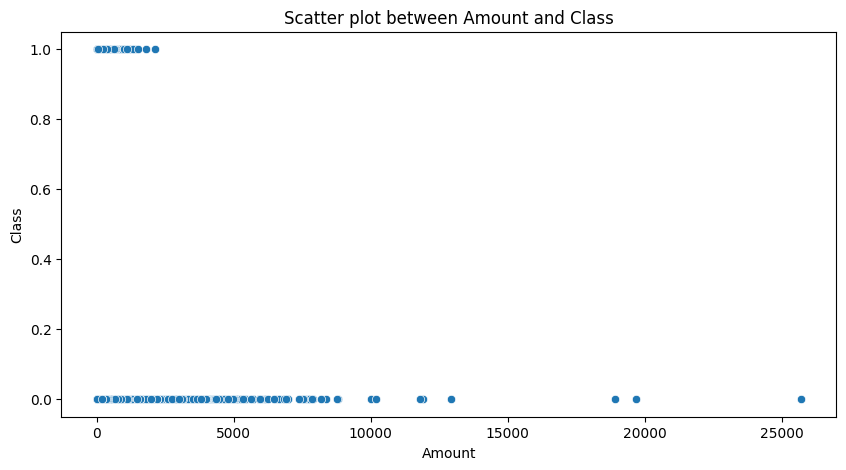

Bivariate analysis between V1 and V2:


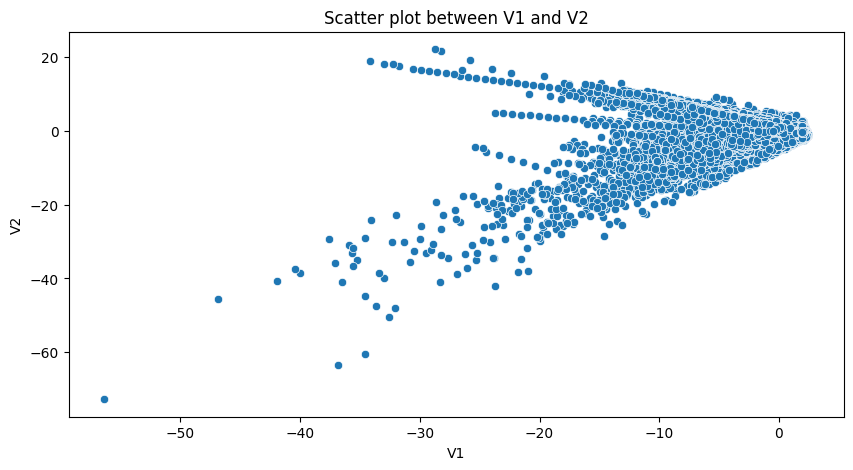

Bivariate analysis between purchase_value and class:


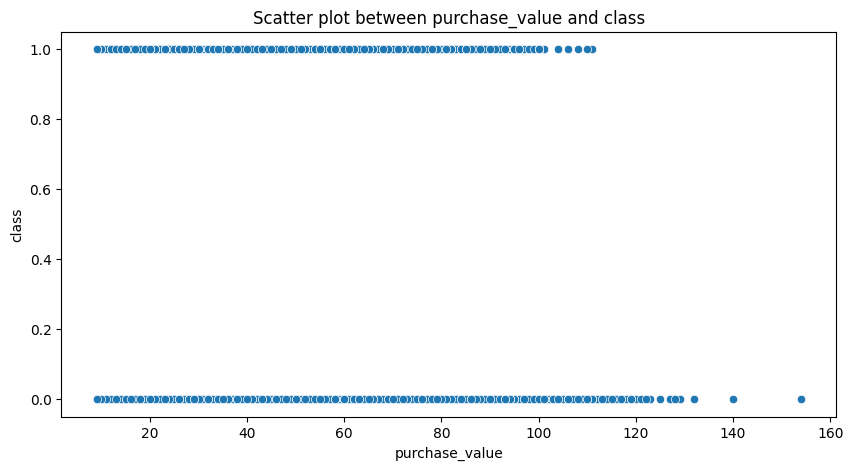

Bivariate analysis between browser and class:


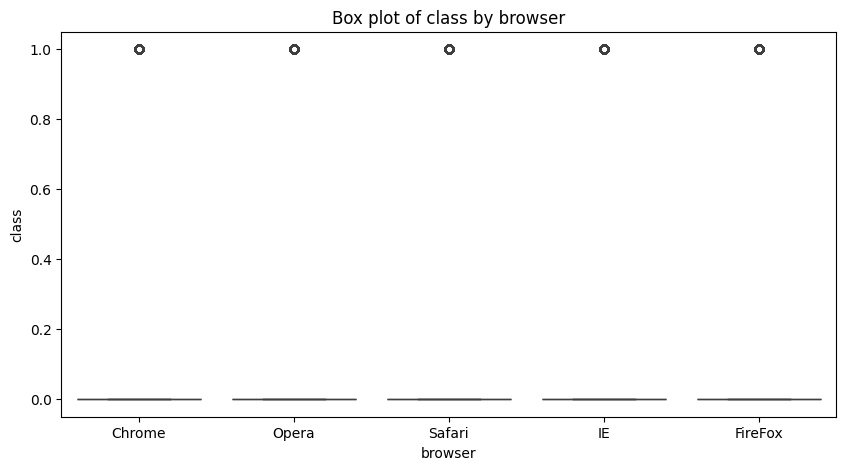

Bivariate analysis between lower_bound_ip_address and country:


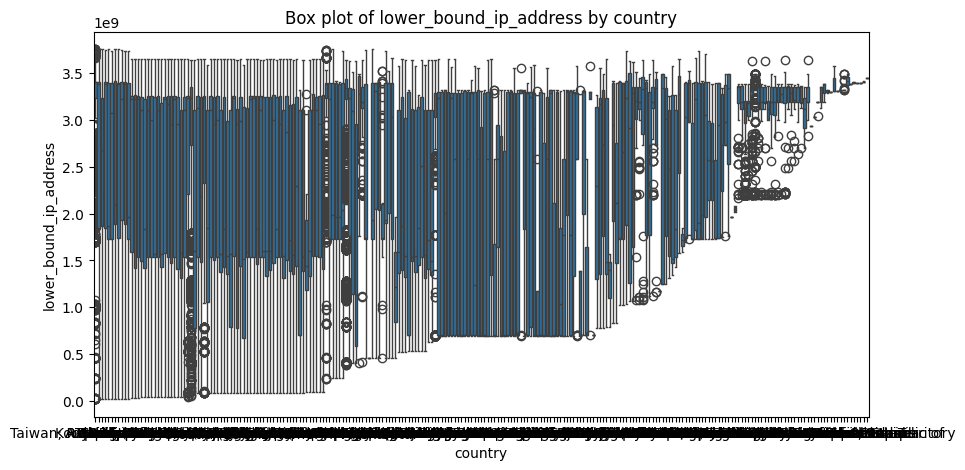

Bivariate analysis between upper_bound_ip_address and country:


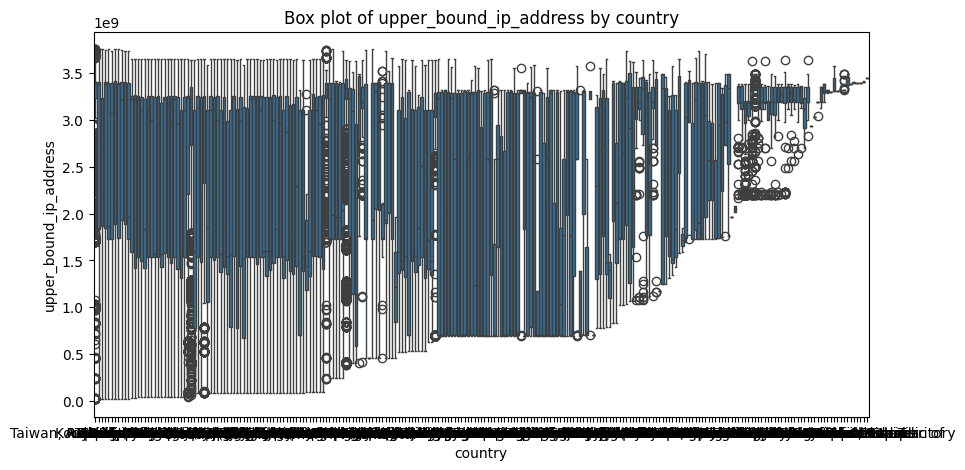

In [31]:
bivariate_analysis(df_credit_cleaned, 'Amount', 'Class')
bivariate_analysis(df_credit_cleaned, 'V1', 'V2')

bivariate_analysis(df_fraud_cleaned, 'purchase_value', 'class')
bivariate_analysis(df_fraud_cleaned, 'browser', 'class')

bivariate_analysis(df_ip_cleaned, 'lower_bound_ip_address', 'country')
bivariate_analysis(df_ip_cleaned, 'upper_bound_ip_address', 'country')